# Holdout Creation

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import scipy


from sklearn.model_selection import train_test_split

NormalizedDf = pd.read_csv('Baird_pp.csv',index_col = 0)
y = NormalizedDf['Installs'].values
XN = NormalizedDf[['Reviews','Type','Rating','Price']]
Y = NormalizedDf['Installs']
X_train, X_test, y_train, y_test = train_test_split(XN, y, test_size = .33, random_state = 0) #holdout

# KNN

     KNN  Score for Training  Score for Testing
1    1.0            0.950895           0.482699
2    2.0            0.727707           0.454671
3    3.0            0.690878           0.475433
4    4.0            0.658653           0.486851
5    5.0            0.637511           0.499654
6    6.0            0.620290           0.507958
7    7.0            0.615857           0.507612
8    8.0            0.605797           0.512111
9    9.0            0.604092           0.517301
10  10.0            0.595737           0.517647


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'knnCount')]

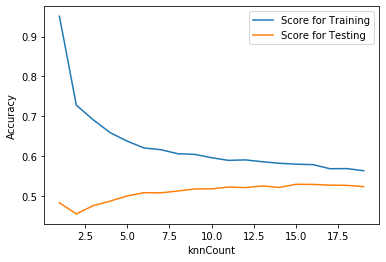

In [2]:
from sklearn.neighbors import KNeighborsClassifier

resultsKNN = pd.DataFrame(columns = ['KNN','Score for Training','Score for Testing'])

for knnCount in range (1,20):
    knn = KNeighborsClassifier(n_neighbors = knnCount, p = 1, metric = 'minkowski')
    knn.fit(X_train, y_train)
    scoreTrain = knn.score(X_train, y_train)
    scoreTest = knn.score(X_test, y_test)
    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]
    
print(resultsKNN.head(10))
resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel = 'knnCount', ylabel = 'Accuracy')

     KNN  Score for Training  Score for Testing
1    1.0            0.950895           0.482699
2    2.0            0.949702           0.479931
3    3.0            0.951236           0.483045
4    4.0            0.953453           0.492734
5    5.0            0.952259           0.492734
6    6.0            0.952941           0.495848
7    7.0            0.953964           0.497924
8    8.0            0.955328           0.506228
9    9.0            0.955328           0.507266
10  10.0            0.955328           0.510035
11  11.0            0.955328           0.511419
12  12.0            0.955328           0.510727
13  13.0            0.955328           0.510381
14  14.0            0.955328           0.512111
15  15.0            0.955328           0.512457
16  16.0            0.955328           0.511419
17  17.0            0.955328           0.514187
18  18.0            0.955328           0.512457
19  19.0            0.955328           0.512457


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'knnCount with Weight')]

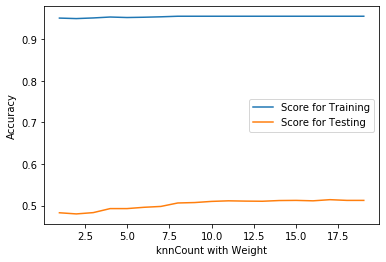

In [3]:
resultsKNN = pd.DataFrame(columns = ['KNN','Score for Training','Score for Testing'])

for knnCount in range (1,20):
    knn = KNeighborsClassifier(n_neighbors = knnCount, p = 1, metric = 'minkowski', weights = 'distance')
    knn.fit(X_train, y_train)
    scoreTrain = knn.score(X_train, y_train)
    scoreTest = knn.score(X_test, y_test)
    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]
    
print(resultsKNN.head(20))
resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel = 'knnCount with Weight', ylabel = 'Accuracy')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15, p = 2, metric = 'minkowski', weights = 'distance')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
scoreTrain = knn.score(X_train, y_train)
print('\n', "Mean Accuracy on Training Samples: ", scoreTrain)
scoreTest = knn.score(X_test, y_test)
print('\n', "Mean Accuracy on Testing Samples: ", scoreTest)


 Mean Accuracy on Training Samples:  0.9553282182438193

 Mean Accuracy on Testing Samples:  0.5128027681660899


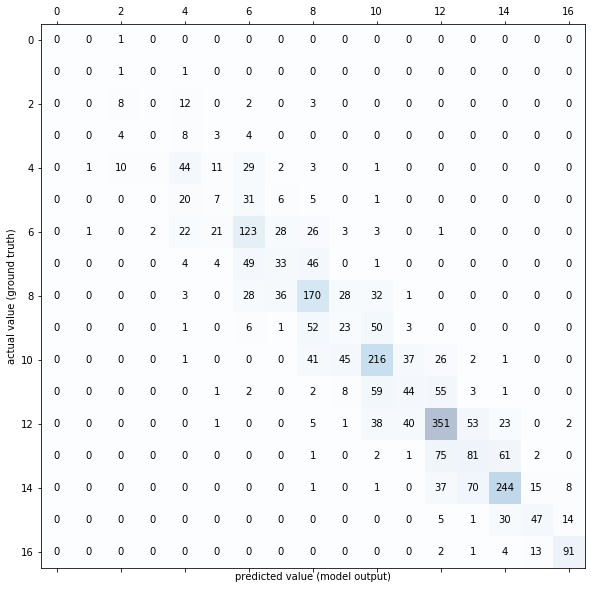

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true = y_test, y_pred = knn_pred)

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = .3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

resultsEntropy = pd.DataFrame(columns = ['LevelLimit','Score for Training','Score for Testing'])
for treeDepth in range (1,11):
    dt_j = DecisionTreeClassifier(criterion = 'entropy', max_depth = treeDepth, random_state = 0)
    dt_j = dt_j.fit(X_train, y_train)
    dt_j.predict(X_test)
    scoreTrain = dt_j.score(X_train, y_train)
    scoreTest = dt_j.score(X_test, y_test)
    resultsEntropy.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]
    
print(resultsEntropy)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.277067           0.275087
2          2.0            0.415175           0.416955
3          3.0            0.464621           0.456747
4          4.0            0.489003           0.477855
5          5.0            0.519693           0.509343
6          6.0            0.534527           0.518339
7          7.0            0.546462           0.513495
8          8.0            0.565558           0.521453
9          9.0            0.583802           0.521453
10        10.0            0.617562           0.524567


In [7]:
resultsGini = pd.DataFrame(columns = ['LevelLimit','Score for Training','Score for Testing'])
for treeDepth in range (1,11):
    dt_j = DecisionTreeClassifier(criterion = 'gini', max_depth = treeDepth, random_state = 0)
    dt_j = dt_j.fit(X_train, y_train)
    dt_j.predict(X_test)
    scoreTrain = dt_j.score(X_train, y_train)
    scoreTest = dt_j.score(X_test, y_test)
    resultsGini.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]
    
print(resultsGini)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.263427           0.260900
2          2.0            0.439045           0.438408
3          3.0            0.491049           0.487889
4          4.0            0.515431           0.507612
5          5.0            0.527877           0.514879
6          6.0            0.543905           0.515917
7          7.0            0.557204           0.525260
8          8.0            0.578687           0.525260
9          9.0            0.601876           0.532180
10        10.0            0.623188           0.526990


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree Depth')]

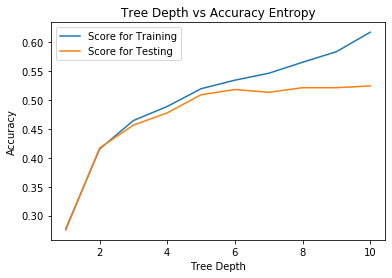

In [8]:
table = resultsEntropy.plot.line(x = 'LevelLimit', y = ['Score for Training','Score for Testing'], title = 'Tree Depth vs Accuracy Entropy')
table.set(xlabel = 'Tree Depth', ylabel = 'Accuracy')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree Depth')]

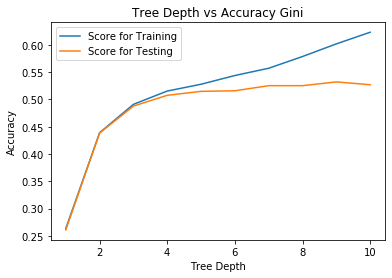

In [9]:
table = resultsGini.plot.line(x = 'LevelLimit', y = ['Score for Training','Score for Testing'], title = 'Tree Depth vs Accuracy Gini')
table.set(xlabel = 'Tree Depth', ylabel = 'Accuracy')

In [10]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 0)
dt = dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
score = dt.score(X_test, y_test)
print('Testing Score: ', score)
score = dt.score(X_train, y_train)
print('Training Score: ', score)

Testing Score:  0.5183391003460207
Training Score:  0.5345268542199488


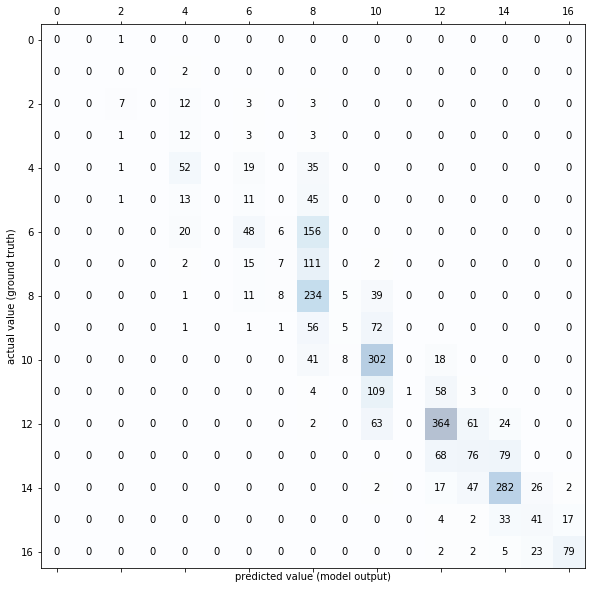

In [11]:
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true = y_test, y_pred = dt_pred)

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = .3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()

# NB Classifier

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print('Testing Score: ', gnb.score(X_test, y_test))
print('Training Score: ', gnb.score(X_train, y_train))

Testing Score:  0.1522491349480969
Training Score:  0.1585677749360614


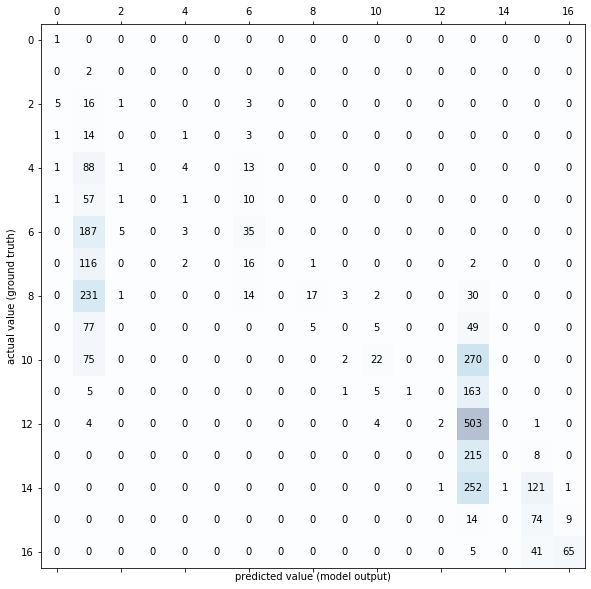

In [13]:
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = .3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show()